In [41]:
#tweet sentiment extraction
import os
import re
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import pandas as pd
import numpy as np
import gensim
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('train.csv',header=0, names=['Textid','tweet','selected text','sentiment'])


In [47]:
data.head()


,Textid,tweet,selected text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [48]:
X=np.zeros(len(data.sentiment))
Y=data.sentiment
for i in range(len(data.sentiment)):
    
    if Y[i] =='negative':
        X[i]=-2
    elif Y[i] == 'neutral':
        X[i]=0
    elif Y[i] == 'positive':
        X[i]=2
    
    
print(X)

[ 0. -2. -2. ...  2.  2.  0.]


In [49]:
#-2= neative ,0= neutral and 2=positive
data['label']=X
data = data[['tweet', 'sentiment','label']]
data.head()



,tweet,sentiment,label
0,"I`d have responded, if I were going",neutral,0.0
1,Sooo SAD I will miss you here in San Diego!!!,negative,-2.0
2,my boss is bullying me...,negative,-2.0
3,what interview! leave me alone,negative,-2.0
4,"Sons of ****, why couldn`t they put them on t...",negative,-2.0


Sentiment Model Evaluation

In [51]:
import os, random

import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

## Set fixed ranom seeds to get reproducible results
seed_val = 0
os.environ['PYTHONHASHSEED'] = str(seed_val)
random.seed(seed_val)
np.random.seed(seed_val)
tf.random.set_seed(seed_val)

Multinomial Logistic Regression

In [52]:

from sklearn.model_selection import train_test_split

X = list(data.tweet.values.astype('U'))
y = list(data.label.values.astype('U'))
labels = ['Negative','Neutral','Positive']
X_train_str, X_test_str, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() 

cv.fit(X_train_str) 

CountVectorizer()

In [54]:
X_train = cv.transform(X_train_str)
X_test = cv.transform(X_test_str)

In [55]:
print(X_train.toarray()[0])

[0 0 0 ... 0 0 0]


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer() 

tfidf.fit(X_train_str) # create the vocabulary

X_train_idf = tfidf.transform(X_train_str)
X_test_idf = tfidf.transform(X_test_str)

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='sag',multi_class='multinomial')
lr.fit(X_train, y_train)

C:\Users\Wehel\anaconda 3+\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(multi_class='multinomial', solver='sag')

In [58]:
from sklearn.metrics import classification_report

y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred, 
                          target_names=labels))

              precision    recall  f1-score   support

    Negative       0.69      0.62      0.66      1504
     Neutral       0.65      0.73      0.69      2259
    Positive       0.78      0.72      0.75      1734

    accuracy                           0.70      5497
   macro avg       0.71      0.69      0.70      5497
weighted avg       0.70      0.70      0.70      5497



Text blob :Naive bayes classifier


In [59]:
data.head()

,tweet,sentiment,label
0,"I`d have responded, if I were going",neutral,0.0
1,Sooo SAD I will miss you here in San Diego!!!,negative,-2.0
2,my boss is bullying me...,negative,-2.0
3,what interview! leave me alone,negative,-2.0
4,"Sons of ****, why couldn`t they put them on t...",negative,-2.0


In [70]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize

def get_polarity(text):
    return TextBlob(text).sentiment.polarity
data['polarity'] = data['tweet'].astype('U').apply(get_polarity)
data['sentiment1']=''
data.loc[data.polarity>0,'sentiment1']='positive'
data.loc[data.polarity==0,'sentiment1']='neutral'
data.loc[data.polarity<0,'sentiment1']='negative'
data.head()

,tweet,sentiment,label,polarity,sentiment1
0,"I`d have responded, if I were going",neutral,0.0,0.000000,neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative,-2.0,-0.976562,negative
2,my boss is bullying me...,negative,-2.0,0.000000,neutral
3,what interview! leave me alone,negative,-2.0,0.000000,neutral
4,"Sons of ****, why couldn`t they put them on t...",negative,-2.0,0.000000,neutral


In [71]:
X=np.zeros(len(data.sentiment1))
Y=data.sentiment1
for i in range(len(data.sentiment1)):
    
    if Y[i] =='negative':
        X[i]=-2
    elif Y[i] == 'neutral':
        X[i]=0
    elif Y[i] == 'positive':
        X[i]=2
    
    
print(X)

[ 0. -2.  0. ...  2.  2.  0.]


In [72]:
data['Label1']=X
data.head()


,tweet,sentiment,label,polarity,sentiment1,Label1
0,"I`d have responded, if I were going",neutral,0.0,0.000000,neutral,0.0
1,Sooo SAD I will miss you here in San Diego!!!,negative,-2.0,-0.976562,negative,-2.0
2,my boss is bullying me...,negative,-2.0,0.000000,neutral,0.0
3,what interview! leave me alone,negative,-2.0,0.000000,neutral,0.0
4,"Sons of ****, why couldn`t they put them on t...",negative,-2.0,0.000000,neutral,0.0


In [73]:
print(classification_report(data.label,data.Label1, 
                          target_names=labels))

              precision    recall  f1-score   support

    Negative       0.66      0.46      0.54      7781
     Neutral       0.60      0.51      0.55     11118
    Positive       0.54      0.80      0.65      8582

    accuracy                           0.59     27481
   macro avg       0.60      0.59      0.58     27481
weighted avg       0.60      0.59      0.58     27481



Decision Trees

In [74]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus

In [75]:
from sklearn.model_selection import train_test_split

X = list(data.tweet.values.astype('U'))
y = list(data.label.values.astype('U'))
labels = ['Negative','Neutral','Positive']

In [76]:
X_train_st, X_test_st, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() 

cv.fit(X_train_st)

CountVectorizer()

In [78]:
X_train = cv.transform(X_train_st)
X_test = cv.transform(X_test_st)

In [79]:
# Create Decision Tree classifer object

#clf=tree.DecisionTreeClassifier()
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test)

In [80]:
print(classification_report(y_test, y_pred1, 
                          target_names=labels))

              precision    recall  f1-score   support

    Negative       0.58      0.58      0.58      1504
     Neutral       0.61      0.63      0.62      2259
    Positive       0.70      0.67      0.69      1734

    accuracy                           0.63      5497
   macro avg       0.63      0.63      0.63      5497
weighted avg       0.63      0.63      0.63      5497



Random Forest:

In [81]:
from sklearn.model_selection import train_test_split

X = list(data.tweet.values.astype('U'))
y = list(data.label.values.astype('U'))
labels = ['Negative','Neutral','Positive']

In [82]:
X_train_str, X_test_str, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() 

cv.fit(X_train_str) 

CountVectorizer()

In [84]:
X_train = cv.transform(X_train_str)
X_test = cv.transform(X_test_str)

In [85]:
#N_ESTIMATORS= number of trees  #
#max_depth= depth of the trees
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=250)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred5=clf.predict(X_test)

In [86]:
print(classification_report(y_test, y_pred5, 
                          target_names=labels))

              precision    recall  f1-score   support

    Negative       0.73      0.54      0.62      1504
     Neutral       0.62      0.79      0.69      2259
    Positive       0.79      0.68      0.73      1734

    accuracy                           0.69      5497
   macro avg       0.71      0.67      0.68      5497
weighted avg       0.70      0.69      0.69      5497



Comparison of the model:

Text(0.5, 1.0, 'Accuracy of the models')

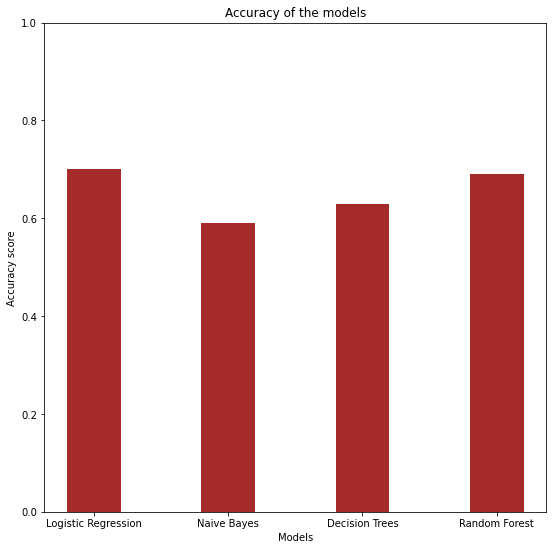

In [87]:
x=['Logistic Regression', 'Naive Bayes', 'Decision Trees','Random Forest']
y=[0.70,0.59,0.63,0.69]
plt.figure(figsize=(9,9))
plt.bar(x,y,color='brown',width=0.4,align='center')
plt.ylim(0,1)
plt.xlabel('Models')
plt.ylabel('Accuracy score')
plt.title('Accuracy of the models')

Baseline:STRATIFIED

In [88]:
from sklearn.dummy import DummyClassifier

In [89]:
from sklearn.model_selection import train_test_split

X = list(data.tweet.values.astype('U'))
y = list(data.label.values.astype('U'))
labels = ['Negative','Neutral','Positive']

In [90]:
X_train_str, X_test_str, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% training and 20% test

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() 

cv.fit(X_train_str) 

CountVectorizer()

In [92]:
X_train = cv.transform(X_train_str)
X_test = cv.transform(X_test_str)

In [93]:
clf = DummyClassifier(strategy='stratified', random_state=0)
clf.fit(X_train, y_train)
y_pred6=clf.predict(X_test)

In [94]:
print(classification_report(y_test, y_pred6, 
                          target_names=labels))

              precision    recall  f1-score   support

    Negative       0.29      0.29      0.29      1563
     Neutral       0.40      0.41      0.41      2195
    Positive       0.32      0.32      0.32      1739

    accuracy                           0.35      5497
   macro avg       0.34      0.34      0.34      5497
weighted avg       0.35      0.35      0.35      5497



Baseline:UNIFORM

In [96]:
from sklearn.model_selection import train_test_split

X = list(data.tweet.values.astype('U'))
y = list(data.label.values.astype('U'))
labels = ['Negative','Neutral','Positive']

In [97]:
X_train_str, X_test_str, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% training and 20% test

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() 

cv.fit(X_train_str) 

CountVectorizer()

In [99]:
X_train = cv.transform(X_train_str)
X_test = cv.transform(X_test_str)

In [106]:
clf = DummyClassifier(strategy='uniform', random_state=0)
clf.fit(X_train, y_train)
y_pred7=clf.predict(X_test)

In [107]:
print(classification_report(y_test, y_pred7, 
                          target_names=labels))

              precision    recall  f1-score   support

    Negative       0.28      0.33      0.30      1563
     Neutral       0.41      0.34      0.37      2195
    Positive       0.31      0.32      0.32      1739

    accuracy                           0.33      5497
   macro avg       0.33      0.33      0.33      5497
weighted avg       0.34      0.33      0.34      5497



So the highest baseline accuracy is 0.35